<a href="https://colab.research.google.com/github/Zyuuu-G/Optics/blob/main/AOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optics Extension - AOM Claculations

###Ziyu Gao
####12/8/2022

In [ ]:
from sympy import *
import numpy as np

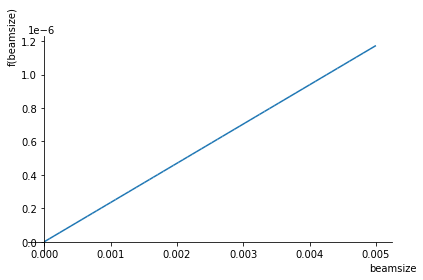

In [ ]:
# part 1.

V_ac = 4260  # acoustic wave speed for TeO2(m/s for longitudinal wave)

bmsize = symbols('beamsize')

proptime  = bmsize/V_ac

plot(proptime, (bmsize,1e-6,5e-3))

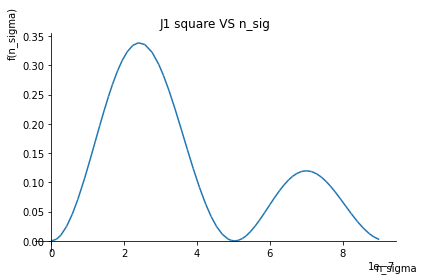

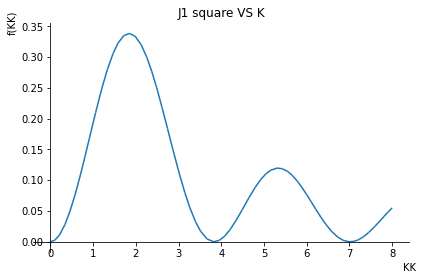

The efficiency at K=1.83 
J0 sqaure  0.104028915553221 
J1 square  0.338537275206350 
J2 square  0.0981914140310182 
J3 square  0.0106274661767872


In [ ]:
# part 2.

lamb0, dz, n0, n_sig, theta = symbols('lamb0 dz n0 n_sigma theta')

kz = 2*pi/lamb0
krf = 456

K = kz*dz*n_sig/(n0*cos(theta))
J1 = besselj(1,K)**2    # J1^2
JJ = J1.subs([(dz,1),(lamb0,550e-9),(n0,1.5),(theta,0)])
plot(JJ,(n_sig,0.0000000,0.0000009), title='J1 square VS n_sig')
# well, I guess this is not necessary

KK,KKK = symbols('KK KKK')
J1sqr = (besselj(1,KK)**2)
plot(J1sqr,(KK,0,8),title='J1 square VS K')

## zooming in to the plot to K (1.5~2.2), K = 1.83 is estimated to optimise the power output
## and the maximum out put is ~ 33.8 %

J11 = (besselj(1,1.83)**2).evalf()
J0 = (besselj(0,1.83)**2).evalf()
J2 = (besselj(2,1.83)**2).evalf()
J3 = (besselj(3,1.83)**2).evalf()

print('The efficiency at K=1.83 \nJ0 sqaure ', J0, '\nJ1 square ', J11, '\nJ2 square ', J2, '\nJ3 square ', J3)


sin(pi*dz*n_sigma/(lamb0*n0*cos(theta)))**2 
 sin(1212121.21212121*pi*n_sigma)**2


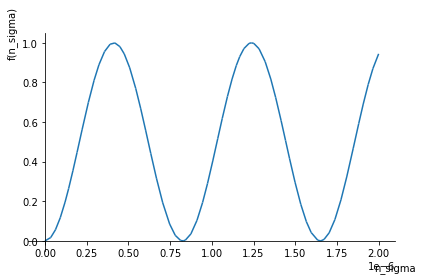

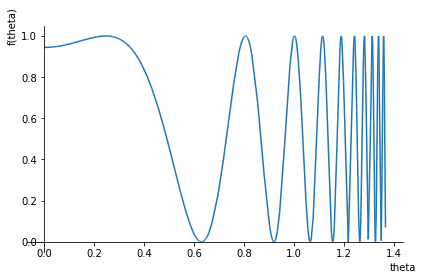

In [ ]:
# part 3.

Rabi = sin(kz*n_sig*dz/(2*n0*cos(theta)))**2

rabi = Rabi.subs([(dz,1),(lamb0,550e-9),(n0,1.5),(theta,0)])
brag = Rabi.subs([(dz,1),(lamb0,550e-9),(n0,1.5),(n_sig,0.000002)])

print(Rabi,'\n',rabi)
plot(rabi,(n_sig,0, 0.000002))

plot(brag, (theta, 0, pi/2.3))

# In the case of Bragg Regime, since there's only one order, the maximum efficiency is one
# To ansswer the question which AOM regime in the lab (efficiency 75~85%). Sine Raman Nath Regime only

Q 2.07736074429002e-7 
K(Q) 0.895094818584756


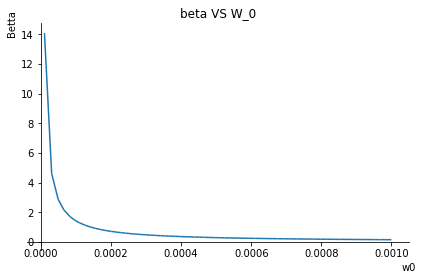

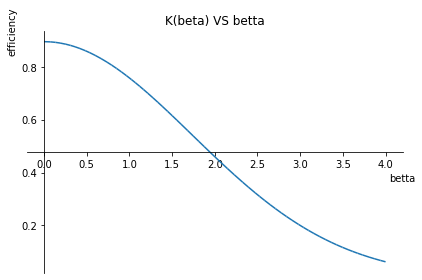

In [ ]:
# part 4.

w0, betta = symbols('w0 betta')
V_ac = 4260 # smae as in part 1.
L = 1e-2 # interaction length
f = 200e6
lamb = 450e-9

beta = lamb*L*f/(1.5*w0*V_ac)
eff = 0.6*exp(-betta**2/(2.45**2)+0.4)

Q = 2*pi*lamb*L*f/(1.5*(V_ac**2))
KofQ = 0.6*exp(-Q**2/(2.45**2)+0.4)
print('Q',Q.evalf(),'\nK(Q)',KofQ.evalf())
plot(beta, (w0,10e-6,1e-3),title='beta VS W_0',ylabel='Betta')
plot(eff, (betta,0,4),title='K(beta) VS betta',ylabel='efficiency')
#plot(eff.subs(betta,beta),(w0,10e-6,1e-3),title='K(beta) VS W_0',ylabel='efficiency')
#plot(KofQ*eff.subs(betta,beta),(w0,10e-6,1e-3),title='K(Q)K(beta) VS W_0',ylabel='efficiency')


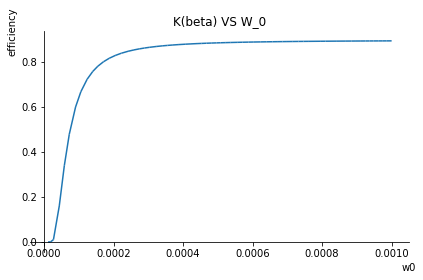

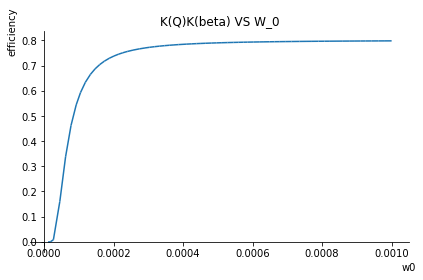

In [ ]:
plot(eff.subs(betta,beta),(w0,10e-6,1e-3),title='K(beta) VS W_0',ylabel='efficiency')
plot(KofQ*eff.subs(betta,beta),(w0,10e-6,1e-3),title='K(Q)K(beta) VS W_0',ylabel='efficiency')


####Looking at the plots above:


*   THe first plot shows the relationship between β factor and beam waist
*   efficiency VS β matches the graph in the PDF
*   plot [efficiency VS beam waist] shows that the bigger the beam waist is, the AOM will get more close to its maximum efficiency.

*   THe last plot is the same as the previous [efficiency VS beam waist] plot, but corrected by throw in a Q factor for.





###Reflection:
##### This extension took me about 2 -3 hours to finsh including the time getting stuck. I learned a little bit about how AOM works and the two regimes. I personally understands Raman_Nath Regime better than Bragg Regime,